In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import h5py
import numpy as np
from activ.analytics import heatmap
from activ.clustering import UmapClusteringResults
from os.path import dirname, join
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import label_binarize

In [7]:
f = h5py.File('/Users/ahyeon/Desktop/activ misc/predict_scores2.h5', 'r')

In [8]:
predictions = f['score'][:]
norm_predictions = f['norm_score'][:]
labels = f['clusters'][:]
umap_dims = f['umap_dimensions'][:]
cluster_sizes = f['cluster_sizes'][:]

In [5]:
predictions.shape

(50, 49, 247)

In [4]:
def conf_alliter(size, predicted, actual):
    confalliter = []
    for j in range(50):
        conf = np.zeros((size,size))
        labs = list(map(int, actual[j][size-2]))
        preds = list(map(int, predicted[j][size-2]))
        for l, p in zip(labs, preds):
            conf[l,p] += 1
        confalliter.append(conf)
    return confalliter

In [5]:
def statistics(matrix):
    mat = np.matrix(matrix)
    i = mat.shape[0]-2
    tp = mat[i,i]
    tn = mat.sum() - mat[i,:].sum() - mat[:,i].sum() + mat[i,i]
    fp = mat[:,i].sum() - mat[i,i]
    fn = mat[i,:].sum() - mat[i,i]
    return tp, tn, fp, fn

In [6]:
def avg_statistics(matrix):
    mat = np.matrix(matrix)
    tps = []
    tns = []
    fps = []
    fns = []
    for i in range(mat.shape[0]):
        tp = mat[i,i]
        tn = mat.sum() - mat[i,:].sum() - mat[:,i].sum() + mat[i,i]
        fp = mat[:,i].sum() - mat[i,i]
        fn = mat[i,:].sum() - mat[i,i]
        tps.append(tp)
        tns.append(tn)
        fps.append(fp)
        fns.append(fn)
    avg_tp = np.mean(tps)
    avg_tn = np.mean(tns)
    avg_fp = np.mean(fps)
    avg_fn = np.mean(fns)
    return avg_tp, avg_tn, avg_fp, avg_fn

In [7]:
def accuracy(mat):
    return mat.trace()/mat.sum()

def specificity(tn, fp):
    return tn/(tn+fp)

def sensitivity(tp, fn):
    return tp/(tp+fn)

def fscore(tp, fp, fn):
    return (2*tp)/(2*tp+fp+fn)

In [18]:
x = ([ 70,  52],[ 53,  72])
print((70+72)/(70+52+53+72))
tp, tn, fp, fn = avg_statistics(x)

print(sensitivity(tp, fn))
print(fscore(tp, fp, fn))

0.5748987854251012
0.574898785425
0.574898785425


In [80]:
def ind_statistics(matrix):
    mat = np.matrix(matrix)
    allvals=[]
    tps = []
    tns = []
    fps = []
    fns = []
    for i in range(mat.shape[0]):
        tp = mat[i,i]
        tn = mat.sum() - mat[i,:].sum() - mat[:,i].sum() + mat[i,i]
        fp = mat[:,i].sum() - mat[i,i]
        fn = mat[i,:].sum() - mat[i,i]
        tps.append(tp)
        tns.append(tn)
        fps.append(fp)
        fns.append(fn)
    allvals.append(tps)
    allvals.append(tns)
    allvals.append(fps)
    allvals.append(fns)
    return allvals

[0.5748987854251012, 0.61133603238866396, 0.61133603238866396, 0.5587044534412956, 0.58704453441295545, 0.5748987854251012, 0.62753036437246967, 0.59919028340080971, 0.62348178137651822, 0.57894736842105265, 0.59514170040485825, 0.57894736842105265, 0.60728744939271251, 0.81781376518218618, 0.60323886639676116, 0.5668016194331984, 0.582995951417004, 0.582995951417004, 0.5587044534412956, 0.5748987854251012, 0.58704453441295545, 0.80566801619433204, 0.582995951417004, 0.62753036437246967, 0.5587044534412956, 0.66396761133603244, 0.56275303643724695, 0.582995951417004, 0.59919028340080971, 0.582995951417004, 0.61943319838056676, 0.54655870445344135, 0.57085020242914974, 0.5668016194331984, 0.58704453441295545, 0.62753036437246967, 0.60323886639676116, 0.5748987854251012, 0.55465587044534415, 0.57894736842105265, 0.5587044534412956, 0.57894736842105265, 0.60728744939271251, 0.5668016194331984, 0.5668016194331984, 0.54655870445344135, 0.55465587044534415, 0.60728744939271251, 0.59514170040

[0.16194331983805668, 0.17408906882591094, 0.13765182186234817, 0.15789473684210525, 0.17004048582995951, 0.11336032388663968, 0.12955465587044535, 0.10931174089068826, 0.15384615384615385, 0.1417004048582996, 0.10931174089068826, 0.145748987854251, 0.16194331983805668, 0.15789473684210525, 0.16194331983805668, 0.12955465587044535, 0.12550607287449392, 0.093117408906882596, 0.14979757085020243, 0.10931174089068826, 0.1417004048582996, 0.13765182186234817, 0.1417004048582996, 0.1214574898785425, 0.1417004048582996, 0.10121457489878542, 0.11740890688259109, 0.10931174089068826, 0.12955465587044535, 0.14979757085020243, 0.15789473684210525, 0.12550607287449392, 0.13360323886639677, 0.13765182186234817, 0.12550607287449392, 0.17408906882591094, 0.1214574898785425, 0.089068825910931168, 0.14979757085020243, 0.12955465587044535, 0.16194331983805668, 0.16194331983805668, 0.1417004048582996, 0.1417004048582996, 0.145748987854251, 0.17004048582995951, 0.17813765182186234, 0.13765182186234817, 0

[0.11740890688259109, 0.085020242914979755, 0.10931174089068826, 0.089068825910931168, 0.093117408906882596, 0.0728744939271255, 0.089068825910931168, 0.093117408906882596, 0.089068825910931168, 0.10121457489878542, 0.10121457489878542, 0.11740890688259109, 0.10931174089068826, 0.10931174089068826, 0.068825910931174086, 0.0728744939271255, 0.085020242914979755, 0.0728744939271255, 0.093117408906882596, 0.089068825910931168, 0.0728744939271255, 0.10931174089068826, 0.1417004048582996, 0.10121457489878542, 0.10526315789473684, 0.10526315789473684, 0.1214574898785425, 0.093117408906882596, 0.10526315789473684, 0.097165991902834009, 0.12550607287449392, 0.097165991902834009, 0.10121457489878542, 0.11740890688259109, 0.11740890688259109, 0.1214574898785425, 0.093117408906882596, 0.11740890688259109, 0.085020242914979755, 0.10931174089068826, 0.12550607287449392, 0.10121457489878542, 0.093117408906882596, 0.085020242914979755, 0.076923076923076927, 0.064777327935222673, 0.10526315789473684, 

[0.10526315789473684, 0.044534412955465584, 0.093117408906882596, 0.068825910931174086, 0.068825910931174086, 0.060728744939271252, 0.080971659919028341, 0.068825910931174086, 0.085020242914979755, 0.0728744939271255, 0.076923076923076927, 0.10121457489878542, 0.10526315789473684, 0.085020242914979755, 0.076923076923076927, 0.064777327935222673, 0.0728744939271255, 0.068825910931174086, 0.0728744939271255, 0.060728744939271252, 0.076923076923076927, 0.080971659919028341, 0.076923076923076927, 0.085020242914979755, 0.089068825910931168, 0.068825910931174086, 0.080971659919028341, 0.089068825910931168, 0.068825910931174086, 0.080971659919028341, 0.0728744939271255, 0.0728744939271255, 0.080971659919028341, 0.093117408906882596, 0.093117408906882596, 0.076923076923076927, 0.085020242914979755, 0.080971659919028341, 0.097165991902834009, 0.097165991902834009, 0.0728744939271255, 0.060728744939271252, 0.048582995951417005, 0.085020242914979755, 0.085020242914979755, 0.085020242914979755, 0.

/Users/ahyeon/anaconda3/envs/activ/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


[0.056680161943319839, 0.028340080971659919, 0.048582995951417005, 0.052631578947368418, 0.044534412955465584, 0.032388663967611336, 0.056680161943319839, 0.048582995951417005, 0.044534412955465584, 0.060728744939271252, 0.060728744939271252, 0.048582995951417005, 0.052631578947368418, 0.048582995951417005, 0.04048582995951417, 0.03643724696356275, 0.032388663967611336, 0.052631578947368418, 0.03643724696356275, 0.044534412955465584, 0.04048582995951417, 0.04048582995951417, 0.056680161943319839, 0.064777327935222673, 0.048582995951417005, 0.044534412955465584, 0.03643724696356275, 0.048582995951417005, 0.04048582995951417, 0.0728744939271255, 0.048582995951417005, 0.04048582995951417, 0.068825910931174086, 0.052631578947368418, 0.052631578947368418, 0.056680161943319839, 0.044534412955465584, 0.03643724696356275, 0.052631578947368418, 0.060728744939271252, 0.060728744939271252, 0.04048582995951417, 0.052631578947368418, 0.044534412955465584, 0.04048582995951417, 0.048582995951417005, 

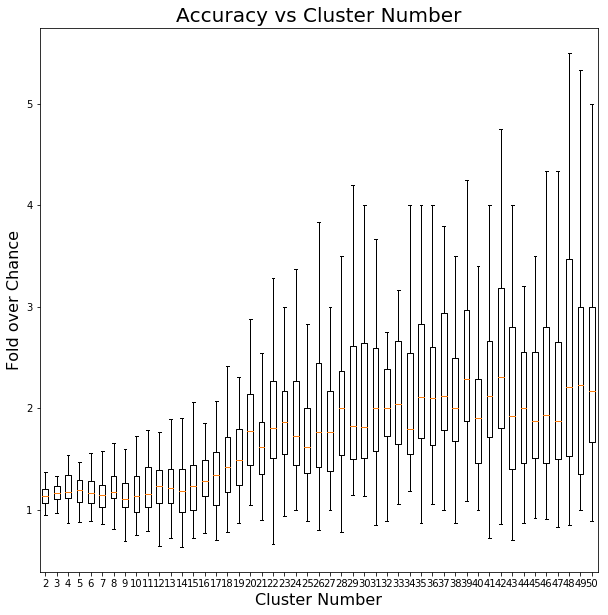

In [12]:
# accuracy
fold_over_chance = np.zeros((len(cluster_sizes), 50))

for ii,c in enumerate(cluster_sizes):
    all50mat = conf_alliter(c, predictions, labels)
    norm_all50mat = conf_alliter(c, norm_predictions, labels)
    acc = [accuracy(i) for i in all50mat]
    print(acc)
    norm_acc = [accuracy(i) for i in norm_all50mat]
    foc = [x/y for x, y in zip(acc, norm_acc)]
    fold_over_chance[ii,:] = foc

plt.figure(figsize=(10,10))
print(fold_over_chance.T)
plt.boxplot(fold_over_chance.T, labels = cluster_sizes, showfliers=False)
plt.xlabel('Cluster Number', fontsize=16)
plt.ylabel('Fold over Chance', fontsize=16)
plt.title('Accuracy vs Cluster Number', fontsize=20)
plt.savefig('/Users/ahyeon/Desktop/activ misc/acc_vs_clusters_predictions.pdf')

In [215]:
x = np.array([[1,2], [3,4]])
x.sum(axis=0)


array([4, 6])

In [40]:
x = ([70.0, 72.0] ,[72.0, 70.0] ,[53.0, 52.0], [52.0, 53.0])
print(type(x))
y= ([24.0, 90.0, 9.0], [127.0, 61.0, 182.0], [45.0, 61.0, 18.0], [51.0, 35.0, 38.0])
for j,k in zip(x,y):
    print(j[0],k[0])
    
for ii,l in enumerate(x):
    print(l)

<class 'tuple'>
70.0 24.0
72.0 127.0
53.0 45.0
52.0 51.0
[70.0, 72.0]
[72.0, 70.0]
[53.0, 52.0]
[52.0, 53.0]


In [58]:
def calc_stats(array):
    for x in range(len(array)):
        print(array[x][0])
        

In [220]:

x = ([70.0, 72.0],[72.0, 70.0],[53.0, 52.0], [52.0, 53.0])
def find_sens(array):
    allsens = []
    for i in range(len(array[0])):
        vals = []
        for elem in array:
            vals.append(elem[i])
        tp = vals[0]
        tn = vals[1]
        fp = vals[2]
        fn = vals[3]

        sens = sensitivity(tp, fn)
        allsens.append(sens)
        allsens_mean = np.mean(allsens)
    return(allsens_mean)

find_sens(x)


0.57488524590163936

In [170]:
def find_spec(array):
    allspec = []
    for i in range(len(array[0])):
        vals = []
        for elem in array:
            vals.append(elem[i])
        tp = vals[0]
        tn = vals[1]
        fp = vals[2]
        fn = vals[3]

        spec = specificity(tn, fp)
        allspec.append(spec)
    return(allspec)

In [174]:
def find_fscore(array):
    allf = []
    for i in range(len(array[0])):
        vals = []
        for elem in array:
            vals.append(elem[i])
        tp = vals[0]
        tn = vals[1]
        fp = vals[2]
        fn = vals[3]

        f = fscore(tp, fp, fn)
        allf.append(f)
    return(allf)

In [200]:
denom = np.arange(1,49)[::-1]
print(denom)

[48 47 46 45 44 43 42 41 40 39 38 37 36 35 34 33 32 31 30 29 28 27 26 25 24
 23 22 21 20 19 18 17 16 15 14 13 12 11 10  9  8  7  6  5  4  3  2  1]


In [221]:
# sensitivity
fold_over_chance = np.zeros((len(cluster_sizes),50))
for i in range(1):
    allvals = []
    for ii, c in enumerate(cluster_sizes):
        sensitivity_50 = []
        norm_sensitivity_50 = []
        all50mat = conf_alliter(c, predictions, labels)
        norm_all50mat = conf_alliter(c, norm_predictions, labels)
        all50mat = np.asarray(all50mat)
        print(all50mat)
        newmat = all50mat[i]

        x = ind_statistics(newmat)
        sens = find_sens(x)
        allvals.append(sens)

    new = allvals
    final = np.zeros((len(cluster_sizes), 50))

    N=48
    for jj,x in enumerate(new):
        x = np.pad(x, (0, N), 'constant')
        N = N-1
        final[jj,:] = x
    print(final)
    denom = np.arange(1,49)[::-1]
    sensitivities = final.sum(axis=0)
    print(sensitivities.shape)
    fold_over_chance[i,:] = sensitivities


[[[  70.   52.]
  [  53.   72.]]

 [[  86.   41.]
  [  55.   65.]]

 [[  78.   49.]
  [  47.   73.]]

 [[  64.   56.]
  [  53.   74.]]

 [[  78.   49.]
  [  53.   67.]]

 [[  71.   51.]
  [  54.   71.]]

 [[  27.   59.]
  [  33.  128.]]

 [[  75.   47.]
  [  52.   73.]]

 [[  89.   41.]
  [  52.   65.]]

 [[  70.   51.]
  [  53.   73.]]

 [[  77.   45.]
  [  55.   70.]]

 [[  68.   52.]
  [  52.   75.]]

 [[  86.   44.]
  [  53.   64.]]

 [[ 195.    7.]
  [  38.    7.]]

 [[  18.   66.]
  [  32.  131.]]

 [[  66.   54.]
  [  53.   74.]]

 [[  73.   49.]
  [  54.   71.]]

 [[  72.   50.]
  [  53.   72.]]

 [[  81.   50.]
  [  59.   57.]]

 [[  66.   54.]
  [  51.   76.]]

 [[  74.   48.]
  [  54.   71.]]

 [[ 192.   10.]
  [  38.    7.]]

 [[  68.   52.]
  [  51.   76.]]

 [[  22.   63.]
  [  29.  133.]]

 [[  65.   55.]
  [  54.   73.]]

 [[  16.   59.]
  [  24.  148.]]

 [[  66.   54.]
  [  54.   73.]]

 [[  65.   55.]
  [  48.   79.]]

 [[  75.   47.]
  [  52.   73.]]

 [[  19.   66.

[[[  4.   0.   4. ...,   2.   0.   5.]
  [  1.   5.   4. ...,   3.   0.   3.]
  [  6.   5.   6. ...,   1.   1.   8.]
  ..., 
  [  2.   5.   6. ...,   2.   0.   2.]
  [  3.   2.   1. ...,   0.   2.   4.]
  [  5.   4.   9. ...,   2.   1.   4.]]

 [[  6.   6.   0. ...,   0.   1.   0.]
  [  8.   6.   6. ...,   0.   4.   0.]
  [  0.   5.   0. ...,   2.   0.   0.]
  ..., 
  [  4.   2.   2. ...,   1.   0.   0.]
  [  1.   1.   0. ...,   0.   0.   1.]
  [  1.   0.   1. ...,   0.   1.   0.]]

 [[  5.   1.   0. ...,   9.   1.   1.]
  [  2.   4.   0. ...,   5.   1.   0.]
  [  2.   2.   1. ...,   3.   0.   0.]
  ..., 
  [  4.   3.   2. ...,  13.   4.   1.]
  [  2.   4.   0. ...,   6.   2.   0.]
  [  1.   0.   0. ...,   7.   0.   1.]]

 ..., 
 [[  5.   1.   4. ...,   3.   0.   0.]
  [  0.   7.   7. ...,   1.   0.   0.]
  [  5.   7.   7. ...,   2.   1.   0.]
  ..., 
  [  2.   4.   3. ...,   4.   0.   0.]
  [  1.   1.   4. ...,   0.   2.   0.]
  [  1.   1.   3. ...,   0.   0.   0.]]

 [[  5.   0.   5.

[[[ 4.  0.  2. ...,  4.  0.  0.]
  [ 1.  2.  0. ...,  3.  2.  0.]
  [ 2.  2.  1. ...,  1.  0.  0.]
  ..., 
  [ 3.  2.  0. ...,  4.  1.  0.]
  [ 0.  2.  0. ...,  1.  0.  0.]
  [ 0.  1.  0. ...,  1.  0.  0.]]

 [[ 5.  0.  1. ...,  0.  1.  2.]
  [ 0.  0.  0. ...,  0.  0.  0.]
  [ 2.  0.  0. ...,  0.  0.  0.]
  ..., 
  [ 1.  0.  0. ...,  0.  2.  0.]
  [ 1.  2.  0. ...,  0.  2.  0.]
  [ 2.  0.  0. ...,  0.  0.  1.]]

 [[ 6.  0.  0. ...,  1.  1.  1.]
  [ 0.  2.  0. ...,  1.  2.  1.]
  [ 1.  1.  1. ...,  0.  0.  0.]
  ..., 
  [ 4.  3.  0. ...,  1.  1.  0.]
  [ 3.  2.  0. ...,  0.  0.  1.]
  [ 0.  0.  1. ...,  1.  2.  0.]]

 ..., 
 [[ 6.  0.  0. ...,  0.  2.  0.]
  [ 0.  3.  0. ...,  2.  0.  3.]
  [ 1.  2.  1. ...,  0.  1.  0.]
  ..., 
  [ 1.  2.  0. ...,  2.  1.  1.]
  [ 1.  0.  0. ...,  1.  0.  0.]
  [ 1.  2.  0. ...,  2.  0.  1.]]

 [[ 6.  0.  0. ...,  1.  0.  0.]
  [ 0.  2.  0. ...,  2.  2.  0.]
  [ 1.  0.  4. ...,  0.  1.  0.]
  ..., 
  [ 1.  2.  0. ...,  1.  0.  0.]
  [ 0.  2.  0. ...,  

[[[ 6.  0.  2. ...,  1.  0.  0.]
  [ 0.  2.  1. ...,  0.  0.  0.]
  [ 2.  0.  1. ...,  0.  0.  0.]
  ..., 
  [ 1.  0.  0. ...,  1.  1.  2.]
  [ 2.  0.  1. ...,  1.  0.  0.]
  [ 0.  0.  0. ...,  2.  0.  0.]]

 [[ 7.  0.  2. ...,  0.  1.  0.]
  [ 0.  0.  0. ...,  0.  0.  0.]
  [ 1.  0.  3. ...,  0.  0.  0.]
  ..., 
  [ 1.  0.  0. ...,  0.  0.  0.]
  [ 2.  0.  0. ...,  0.  1.  0.]
  [ 1.  0.  0. ...,  0.  0.  0.]]

 [[ 6.  0.  0. ...,  0.  0.  0.]
  [ 0.  2.  0. ...,  0.  1.  1.]
  [ 1.  0.  2. ...,  0.  1.  0.]
  ..., 
  [ 0.  0.  0. ...,  0.  0.  0.]
  [ 1.  0.  0. ...,  0.  0.  1.]
  [ 0.  2.  0. ...,  0.  1.  2.]]

 ..., 
 [[ 7.  0.  2. ...,  0.  1.  0.]
  [ 0.  3.  0. ...,  1.  0.  0.]
  [ 1.  2.  2. ...,  0.  0.  0.]
  ..., 
  [ 0.  0.  0. ...,  0.  2.  0.]
  [ 1.  0.  0. ...,  1.  2.  0.]
  [ 0.  0.  0. ...,  0.  0.  0.]]

 [[ 0.  0.  1. ...,  1.  0.  2.]
  [ 0.  2.  0. ...,  2.  0.  0.]
  [ 1.  0.  3. ...,  1.  0.  0.]
  ..., 
  [ 1.  2.  0. ...,  1.  0.  0.]
  [ 0.  0.  0. ...,  

[[[ 7.  0.  0. ...,  0.  0.  0.]
  [ 0.  2.  0. ...,  0.  0.  0.]
  [ 1.  0.  1. ...,  0.  0.  0.]
  ..., 
  [ 0.  0.  0. ...,  0.  1.  0.]
  [ 0.  0.  0. ...,  0.  1.  0.]
  [ 0.  0.  0. ...,  0.  0.  0.]]

 [[ 0.  0.  0. ...,  0.  0.  0.]
  [ 0.  0.  0. ...,  0.  0.  0.]
  [ 0.  0.  4. ...,  0.  0.  0.]
  ..., 
  [ 0.  0.  0. ...,  1.  1.  0.]
  [ 0.  0.  1. ...,  0.  0.  0.]
  [ 0.  0.  0. ...,  0.  0.  0.]]

 [[ 6.  0.  0. ...,  0.  0.  0.]
  [ 0.  2.  0. ...,  0.  0.  0.]
  [ 0.  0.  1. ...,  0.  0.  0.]
  ..., 
  [ 0.  0.  0. ...,  1.  1.  0.]
  [ 0.  0.  0. ...,  0.  0.  0.]
  [ 0.  0.  0. ...,  0.  0.  0.]]

 ..., 
 [[ 7.  0.  1. ...,  0.  0.  0.]
  [ 0.  0.  0. ...,  1.  0.  0.]
  [ 0.  0.  1. ...,  0.  0.  0.]
  ..., 
  [ 1.  0.  0. ...,  0.  1.  1.]
  [ 0.  0.  0. ...,  0.  1.  0.]
  [ 1.  0.  0. ...,  0.  0.  0.]]

 [[ 0.  0.  0. ...,  0.  0.  0.]
  [ 0.  0.  0. ...,  0.  0.  0.]
  [ 0.  0.  0. ...,  0.  0.  0.]
  ..., 
  [ 0.  0.  0. ...,  0.  0.  0.]
  [ 1.  0.  0. ...,  

[[[ 4.  0.  0. ...,  0.  0.  0.]
  [ 0.  0.  0. ...,  0.  0.  0.]
  [ 0.  0.  1. ...,  0.  0.  0.]
  ..., 
  [ 0.  0.  0. ...,  1.  0.  0.]
  [ 0.  0.  0. ...,  0.  0.  0.]
  [ 0.  0.  0. ...,  0.  0.  0.]]

 [[ 0.  0.  0. ...,  0.  0.  0.]
  [ 0.  0.  0. ...,  0.  0.  0.]
  [ 0.  0.  0. ...,  0.  0.  0.]
  ..., 
  [ 0.  0.  0. ...,  0.  0.  0.]
  [ 0.  0.  0. ...,  0.  0.  0.]
  [ 0.  0.  0. ...,  0.  0.  0.]]

 [[ 4.  0.  0. ...,  0.  0.  0.]
  [ 0.  0.  0. ...,  0.  0.  0.]
  [ 0.  0.  1. ...,  0.  0.  0.]
  ..., 
  [ 0.  0.  0. ...,  1.  1.  0.]
  [ 0.  0.  0. ...,  1.  0.  0.]
  [ 0.  0.  0. ...,  0.  0.  0.]]

 ..., 
 [[ 4.  0.  0. ...,  0.  0.  0.]
  [ 0.  0.  0. ...,  0.  0.  0.]
  [ 0.  0.  3. ...,  0.  0.  0.]
  ..., 
  [ 0.  0.  1. ...,  0.  0.  0.]
  [ 0.  0.  0. ...,  0.  0.  0.]
  [ 0.  0.  0. ...,  0.  0.  0.]]

 [[ 0.  0.  0. ...,  1.  0.  0.]
  [ 0.  0.  0. ...,  0.  0.  0.]
  [ 0.  0.  0. ...,  0.  0.  0.]
  ..., 
  [ 1.  0.  0. ...,  2.  1.  0.]
  [ 0.  0.  0. ...,  

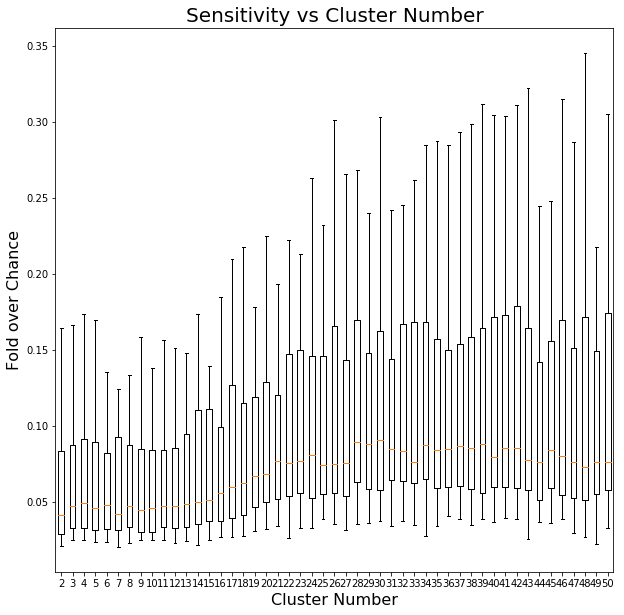

In [197]:
plt.figure(figsize=(10,10))
plt.boxplot(fold_over_chance, labels = cluster_sizes, showfliers=False)
plt.xlabel('Cluster Number', fontsize=16)
plt.ylabel('Fold over Chance', fontsize=16)
plt.title('Sensitivity vs Cluster Number', fontsize=20)
plt.savefig('/Users/ahyeon/Desktop/activ misc/sens_vs_clusters_predictions.pdf')

In [180]:
# specificity
spec_fold_over_chance = np.zeros((50,len(cluster_sizes)))
for i in range(50):
    allvals = []
    for ii, c in enumerate(cluster_sizes):
        sensitivity_50 = []
        norm_sensitivity_50 = []
        all50mat = conf_alliter(c, predictions, labels)
        norm_all50mat = conf_alliter(c, norm_predictions, labels)
        all50mat = np.asarray(all50mat)
        newmat = all50mat[i]

        x = ind_statistics(newmat)
        spec = find_spec(x)
        allvals.append(spec)

    new = allvals
    final = np.zeros((len(cluster_sizes), 50))

    N=48
    for jj,x in enumerate(new):
        x = np.pad(x, (0, N), 'constant')
        N = N-1
        final[jj,:] = x
    specificities = final.mean(axis=1)
    spec_fold_over_chance[i,:] = specificities

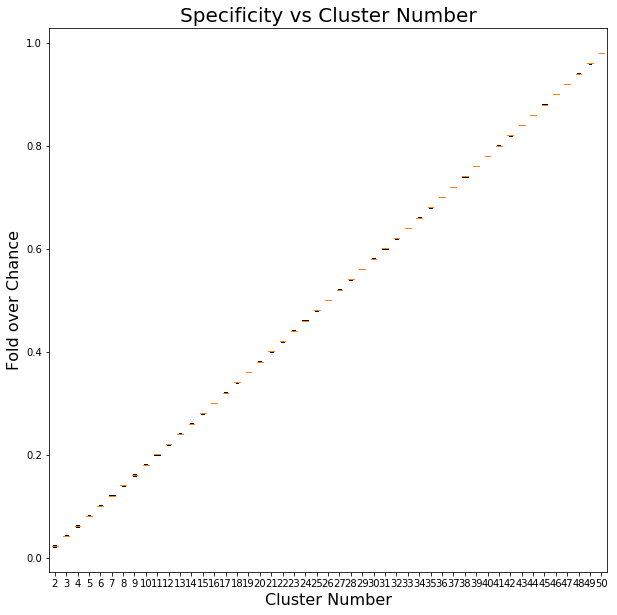

In [181]:
plt.figure(figsize=(10,10))
plt.boxplot(spec_fold_over_chance, labels = cluster_sizes, showfliers=False)
plt.xlabel('Cluster Number', fontsize=16)
plt.ylabel('Fold over Chance', fontsize=16)
plt.title('Specificity vs Cluster Number', fontsize=20)
plt.savefig('/Users/ahyeon/Desktop/activ misc/spec_vs_clusters_predictions.pdf')

In [ ]:
class 2: 2x2
class 50: 50x50

In [219]:
# fscore
f_fold_over_chance = np.zeros((50,len(cluster_sizes)))
for i in range(1):
    allvals = []
    for ii, c in enumerate(cluster_sizes):
        sensitivity_50 = []
        norm_sensitivity_50 = []
        all50mat = conf_alliter(c, predictions, labels)
        norm_all50mat = conf_alliter(c, norm_predictions, labels)
        all50mat = np.asarray(all50mat)
        newmat = all50mat[i]
        x = ind_statistics(newmat)
        f = find_fscore(x)
        allvals.append(f)

    new = allvals
    print(len(new[0]))
    print(len(new[48]))
    final = np.zeros((len(cluster_sizes), 50))
    
    N=48
    for jj,x in enumerate(new):
        x = np.pad(x, (0, N), 'constant')
        N = N-1
        final[jj,:] = x
    fscores = final.sum(axis=0)
    print(final)
    print(final.shape)
    print(fscores.shape)
    print(fscores)
    f_fold_over_chance[i,:] = fscores

2
50
[[ 0.57142857  0.57831325  0.         ...,  0.          0.          0.        ]
 [ 0.33333333  0.65217391  0.24324324 ...,  0.          0.          0.        ]
 [ 0.40935673  0.29508197  0.28571429 ...,  0.          0.          0.        ]
 ..., 
 [ 0.57142857  0.          0.24       ...,  0.          0.          0.        ]
 [ 0.53333333  0.          0.08333333 ...,  0.          0.          0.        ]
 [ 0.57142857  0.          0.         ...,  0.          0.          0.        ]]
(49, 50)
(50,)
[ 16.90490102   8.5767527    5.14223502   4.16324786   6.11959097
   5.39743639   0.75913288   2.62791021   3.09390591   3.52753394
   0.90285057   1.30283194   3.76709402   3.02496576   2.56320979
   5.74042951   4.08425469   1.88117025   2.57345905   1.64390785
   1.3702381    1.24719888   0.50098039   0.15384615   0.41904762
   0.11764706   0.2967033    0.15384615   0.           0.           0.18181818
   0.2          0.33333333   0.27705628   0.28333333   0.25910931
   0.25384615   0

ValueError: could not broadcast input array from shape (50) into shape (49)

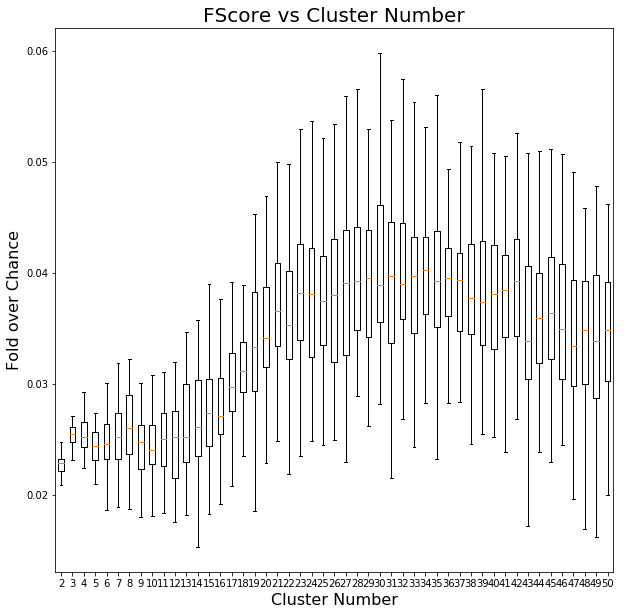

In [183]:
plt.figure(figsize=(10,10))
plt.boxplot(f_fold_over_chance, labels = cluster_sizes, showfliers=False)
plt.xlabel('Cluster Number', fontsize=16)
plt.ylabel('Fold over Chance', fontsize=16)
plt.title('FScore vs Cluster Number', fontsize=20)
plt.savefig('/Users/ahyeon/Desktop/activ misc/fscore_vs_clusters_predictions.pdf')